In [6]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import numpy as np
import matplotlib.pyplot as plt
import cv2

from tSVD import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### tSVD Demo: Image Denosing 

In [7]:
img = cv2.imread('../demo/noisy.jpg',cv2.IMREAD_GRAYSCALE)
img = img.astype(np.float64)

In [3]:
u,s,vt = partial_svd(img, 1000, 0.0001)

In [9]:
s

array([25931.55078125,  7050.07958984,  3344.00146484,  2533.32128906,
        2174.75439453,  1929.28674316,  1871.44287109,  1662.65759277,
        1623.05957031,  1456.19250488,  1408.51672363,  1327.28393555,
        1214.83935547,  1133.55944824,  1114.64904785,  1082.14111328,
        1011.03198242,   971.44628906,   965.42559814,   925.58343506,
         916.20281982,   913.57067871,   891.29150391,   873.43011475,
         862.55169678,   821.53192139,   805.08618164,   806.58990479,
         780.19903564,   771.30163574,   753.2789917 ,   747.78637695,
         741.26397705,   719.56988525,   718.77862549,   702.64666748,
         705.23394775,   680.85357666,   674.7310791 ,   661.54510498,
         656.18371582,   658.77081299,   647.27655029,   639.5300293 ,
         629.95037842,   623.88916016,   611.50897217,   622.84771729,
         606.27685547,   596.12878418,   597.84368896,   585.14129639,
         577.80297852,   574.57354736,   562.70074463,   559.02313232,
      

In [35]:
reconstructed_img = np.dot(u*s, vt)

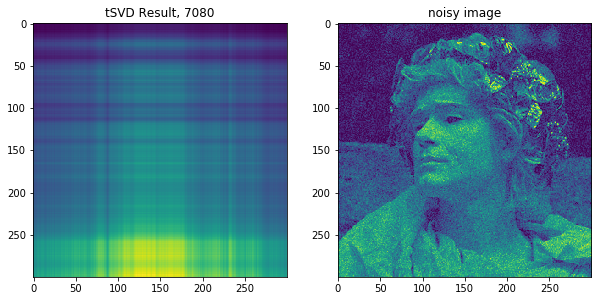

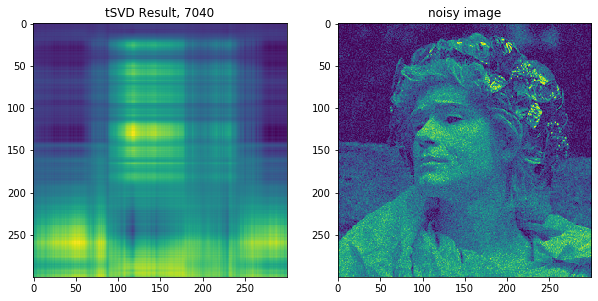

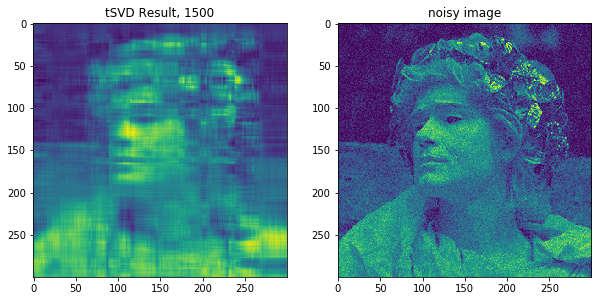

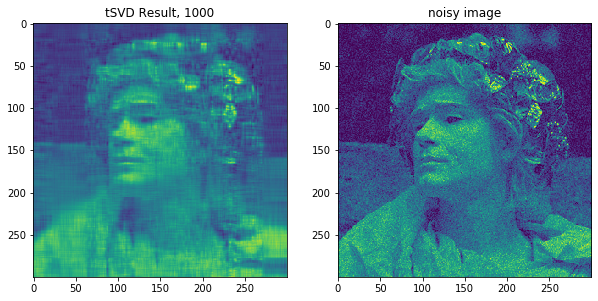

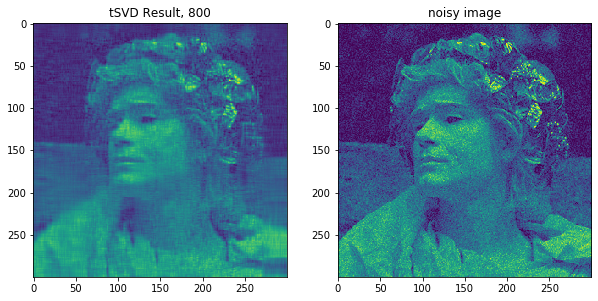

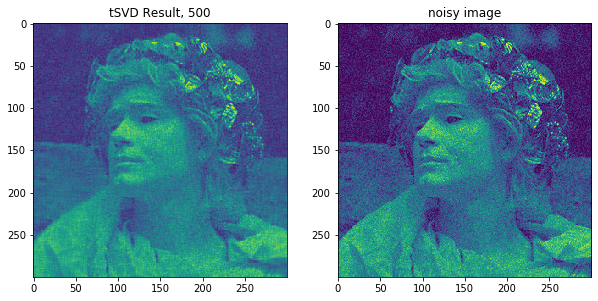

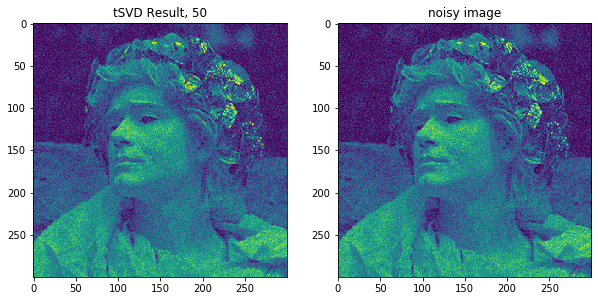

In [45]:
threshold = [7080, 7040, 1500, 1000, 800, 500,  50]

for th in threshold:
    
    u,s,vt = partial_svd(img, th, 0.0001)
    reconstructed_img = np.dot(u*s, vt)
    fig = plt.figure(figsize=(10,10))
    fig.add_subplot(1,2,1)
    plt.imshow(reconstructed_img)
    plt.title("tSVD Result, %s"%str(th) )
    fig.add_subplot(1,2,2)
    plt.imshow(img)
    plt.title("noisy image")
    plt.show()

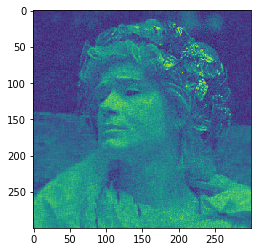

In [10]:
u,s,vt = partial_svd(img, 500, 100)
reconstructed_img = np.dot(u*s, vt)
plt.imshow(reconstructed_img)


### Performance Benchmarking

In [ ]:
import time

ths = np.arange(2, 7080, 50)
ts = []
ts_np = []
for th in ths:
 
    start = time.time()
    u,s,vt = partial_svd(img, th, 0.0001)
    end = time.time()
    ts.append(end-start)
    
    a = np.random.randint(0, 400, (th, th))
    start2 = time.time()
    u2,s2,v2 = np.linalg.svd(a)
    end2 = time.time()
    ts_np.append(end2-start2)


Text(0.5, 1.0, 'threshold value vs time')

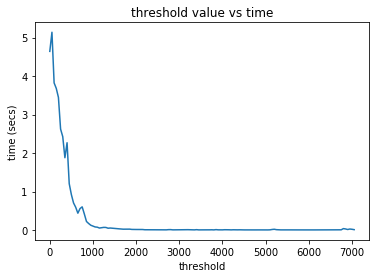

In [10]:
plt.plot(ths,ts,'b', ths,ts, 'r')
plt.xlabel("threshold")
plt.ylabel("time (secs)")
plt.title("threshold value vs time")
plt.savefig('performance.png')
plt.show()